<a href="https://colab.research.google.com/github/iversonzpy/MachineLearning/blob/master/AdaBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPS 218 Spring 2019 Assignment 3 Programming Component

## 1.- AdaBoosting

Given the dataset below, compare the performance of:
- our implementation of logistic regression
- a weak learner (depth-1 decision tree)
- AdaBoosting (with decision trees as weak learners)

(500, 2) (500,)


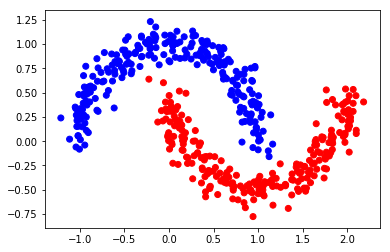

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_moons

# This time we are going to use 500 data points and we're going to split them in a 75%/25% training/test datasets
np.random.seed(33)
data, labels = make_moons(n_samples=500, noise=0.1)
data_train, data_test, labels_train, labels_test = train_test_split(data, labels)

colors = ['r' if y else 'b' for y in labels]
print(data.shape, labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

### Our Logistic Regression Implementation
This time we train our model only with the training data (data_train, labels_train).
You don't need to modify anything in this code block

In [0]:
import math

def logistic(x, w):
    return sigmoid(np.matmul(x,w))
    raise NotImplementedError()
    
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
    raise NotImplementedError()

def sigmoid_derivative(z):
    return sigmoid(z)*(1.0 - sigmoid(z))
    raise NotImplementedError()
  
def loss_func(y, h):
    return np.dot((y - h),(y - h))*0.5
    raise NotImplementedError()
  
def loss_func_derivative(y, h, x):
    return np.dot((y - h) * sigmoid_derivative(h), x)
    
def accuracy(y, h):
    return 100-(100*np.dot((y - np.round(h)),(y - np.round(h)))/y.size)
    raise NotImplementedError()

def logistic_regression(x, y, loss_func_derivative, learning_rate, num_steps=14):
    # start with intial parameters w_i = 1
    w = np.ones(3)
    # include a bias term
    x = np.pad(x, [[0,0], [1,0]], mode='constant', constant_values=1.0)
    # print("x", x)

    print('Initial Accuracy:{}%'.format(accuracy(y, np.round(logistic(x, w)))))
    prev_loss = 0
    for step in range(num_steps):
        h = logistic(x, w)
        loss = loss_func(y, h)
        if math.fabs(loss - prev_loss) < 0.0000001:
            # return when converged.
            return w
                
        w = w + (learning_rate * loss_func_derivative(y, h, x))
        print('Step {} Accuracy:{}%, Loss: {}'.format(step+1, accuracy(y, np.round(logistic(x, w))), loss))
        prev_loss = loss
    return w
    
learning_rate = 0.5
# This time we only train our model with the training data (data_train, labels_train)
ws = logistic_regression(data_train, labels_train, loss_func_derivative, learning_rate)

Initial Accuracy:49.86666666666667%
Step 1 Accuracy:50.93333333333333%, Loss: 66.56445594382772
Step 2 Accuracy:78.4%, Loss: 91.0820593178594
Step 3 Accuracy:82.13333333333333%, Loss: 40.15679979024624
Step 4 Accuracy:82.93333333333334%, Loss: 32.14893035539444
Step 5 Accuracy:84.0%, Loss: 29.321772581445167
Step 6 Accuracy:85.06666666666666%, Loss: 27.147980493117934
Step 7 Accuracy:86.66666666666667%, Loss: 24.536675080045626
Step 8 Accuracy:88.26666666666667%, Loss: 21.628788889698804
Step 9 Accuracy:88.26666666666667%, Loss: 19.04451304504101
Step 10 Accuracy:88.0%, Loss: 18.17747231879379
Step 11 Accuracy:88.0%, Loss: 18.06255905922704
Step 12 Accuracy:88.8%, Loss: 18.0939995441301
Step 13 Accuracy:87.73333333333333%, Loss: 17.87203977284972
Step 14 Accuracy:88.8%, Loss: 17.90284648139323


#### Function to plot the decision boundary. DON'T MODIFY IT

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True, w=np.array([ 0., 0., 1.])):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    if clf == 'ourImplementation':
        y_pred = np.round(logistic(np.pad(X_new, [[0,0], [1,0]], mode='constant', constant_values=1.0), w)).reshape(x1.shape)
    else:
        y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.show()

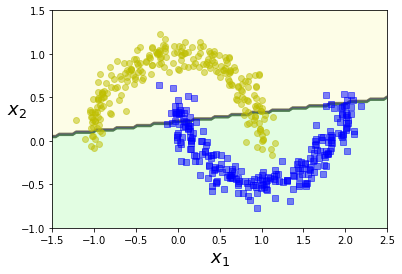

In [0]:
#Plot the results
plot_decision_boundary('ourImplementation', data, labels, w=ws)

#### Accuracy of our logistic regression implementation in the test set

In [0]:
accuracy(labels_test, np.round(logistic(np.pad(data_test, [[0,0], [1,0]], mode='constant', constant_values=1.0), ws)))

83.2

### A weak learner (depth-1 decision tree)
Use the Decision Tree Classifier implementation in scikit-learn to create a depth-1 decision tree.
Train this model using only the training data (data_train, labels_train)

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Create a depth-1 decision tree called dt_clf and train it using ONLY the training set (data_train, labels_train)
# YOUR CODE HERE

dt_clf = DecisionTreeClassifier(max_depth = 1)
dt_clf = dt_clf.fit(data_train, labels_train)

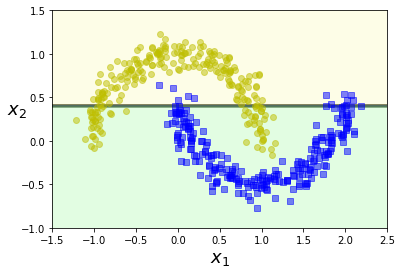

In [0]:
#Plot your results
plot_decision_boundary(dt_clf, data, labels)

#### Accuracy of the depth-1 decision tree in the test set
Use the accuracy_score implementation in scikit-learn to compute the accuracy of your decision tree in the test set (data_test, labels_test)

In [0]:
from sklearn.metrics import accuracy_score

# Compute and print the accuracy of the depth-1 decision tree using the test data (data_test, labels_test)
# The correct accuracy should be between 0.75 and 0.8
#YOUR CODE HERE

y_pred = dt_clf.predict(data_test)
accuracy_score(labels_test, y_pred)


0.8

### AdaBoosting (with depth-1 decision trees as weak learners)
Use the AdaBoost Classifier implementation in scikit-learn to create an AdaBoosting classifier using depth-1 decision trees as weak learners. Train this model using only the training data (data_train, labels_train)

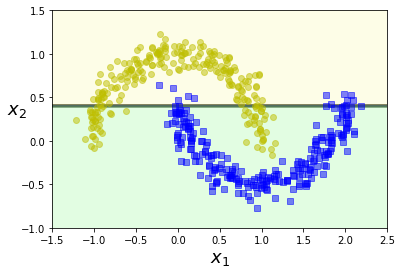

n_estimators = 1, accuracy = 0.8


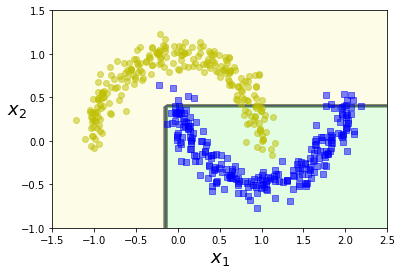

n_estimators = 2, accuracy = 0.872


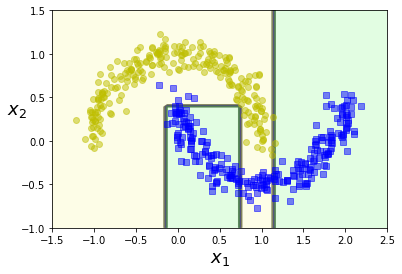

n_estimators = 4, accuracy = 0.92


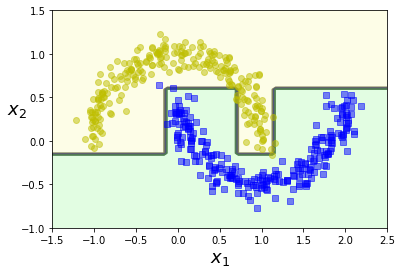

n_estimators = 8, accuracy = 0.984


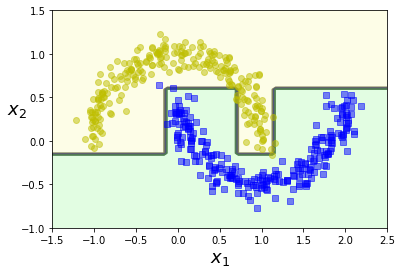

n_estimators = 16, accuracy = 0.984


In [0]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoosting classifier called ada_clf using depth-1 decision trees as weak learners.
# Train this classifier using ONLY the training set (data_train, labels_train)
# Use the following values for the 'n_estimators' parameter: n_estimators = 1, 2, 4, 8 and 16
# YOUR CODE HERE
def ada_n_estimators(n):
    ada_clf = AdaBoostClassifier(n_estimators = n)
    ada_clf = ada_clf.fit(data_train, labels_train)
    return ada_clf

list = [1,2,4,8,16]

for i in list:
    ada_clf = ada_n_estimators(i)
    #Plot your results (create a different plot for different values of n_estimators = 1, 2, 4, 8 and 16)
    plot_decision_boundary(ada_clf, data, labels)
    y_pred = ada_clf.predict(data_test)
    print('n_estimators = {}, accuracy = {}'.format(i, accuracy_score(labels_test, y_pred)))

(500, 2) (500,)


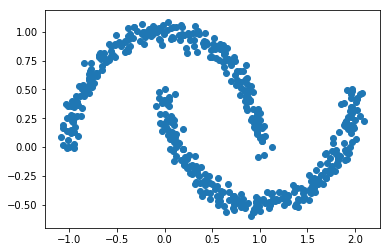

In [0]:
clustering_data, clustering_labels = make_moons(n_samples=500, noise=0.05)

print(clustering_data.shape, clustering_labels.shape)
plt.scatter(clustering_data[:,0], clustering_data[:,1])
plt.show()

### k-means
Implement the k-means algorithm. Create a partition of the dataset.

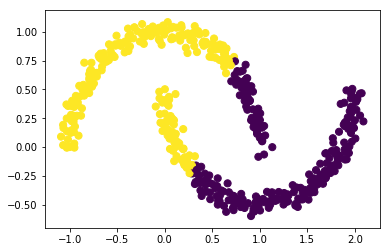

In [0]:
from sklearn.metrics import pairwise_distances_argmin

# Create a partition of the 'clustering_data' using the k-means algorithm with k=2
def find_clusters(X, n_clusters):
    # 0. Initialize cluster centers. For this assignment, we'll initialize the centers deterministically
    centers = np.array([[1.5, 0.],[-.5, 0.]])
    
    while True:
        # 1. Expectation-Step: assign points to the nearest cluster center
        # YOUR CODE HERE
        # Hint: use the 'pairwise_distances_argmin' function
        membership = pairwise_distances_argmin(X, centers)
        
        # 2. Maximization-Step: set the cluster centers to the mean of the data points in the cluster
        # YOUR CODE HERE
        # Hint: create an auxiliar 'new_centers' array to store the new centers.
        #       You'll need to compare the previous centers with the new ones to check for convergence
        new_centers = np.array([X[membership == i].mean(0)
                                for i in range(n_clusters)])
        
        # 3a. Check for convergence. If all the new centers are equal to the previous centers, stop.
        #                            Otherwise, update the cluster centers and repeat the loop.
        # YOUR CODE HERE
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, membership

centers, membership_km = find_clusters(clustering_data, 2)

#Plot your results
plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=membership_km, s=50, cmap='viridis')
plt.show()

### DBSCAN
Use the DBSCAN implementation in scikit-learn to create a partition of the dataset.

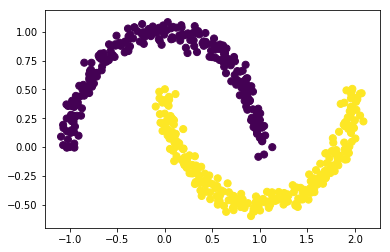

In [0]:
from sklearn.cluster import DBSCAN

# Create a partition of the 'clustering_data' using the DBSCAN algorithm (name it 'dbscan'). Use 'eps=0.2'
# YOUR CODE HERE
dbscan = DBSCAN(eps=0.2)

# Use the 'fit_predict' method of the DBSCAN implementation to cluster the 'clustering_data'
membership_dbs = dbscan.fit_predict(clustering_data)

# Plot your results
plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=membership_dbs, s=50, cmap='viridis')
plt.show()

### Spectral Clustering
Use the Spectral Clustering implementation in scikit-learn to create a partition of the dataset.
WARNING: scikit-learn has a 'sklearn.cluster.SpectralClustering' and a 'sklearn.cluster.spectral_clustering' implementation. Use the former.

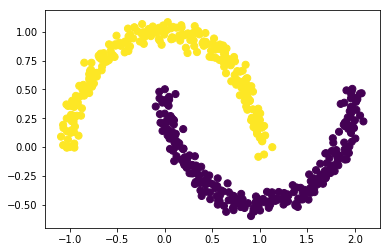

In [0]:
from sklearn.cluster import SpectralClustering

# Create a partition of the 'clustering_data' using the SpectralClustering algorithm (name it 'sc1').
# Use 'n_clusters=2, gamma=100'
# YOUR CODE HERE
scl = SpectralClustering(n_clusters=2, gamma=100)

# Use the 'fit_predict' method of the SpectralClustering implementation to cluster the 'clustering_data'
# YOUR CODE HERE
membership_sc = scl.fit_predict(clustering_data)
# Plot your results
plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=membership_sc, s=50, cmap='viridis')
plt.show()

In [0]:
# First, let's verify if you have tensorflow installed in your machine and if your tensorflow installation is working 
import tensorflow as tf

# tensorflow version
print('tensorflow version:')
print(tf.__version__)

# Tensorflow has a lazy evaluation. Here we are defining a dataflow graph
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

tensorflow version:
1.13.1
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Execute the operations defined in the graph
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [0]:
# Release the resources once they are no longer required
sess.close()

### Import and load the mnist dataset
The MNIST dataset (Modified National Institute of Standards and Technology database) is a dataset of handwritten digits that is commonly used for training various image processing systems. Every image has size 28x28 pixels

In [0]:
# Import the mnist dataset
mnist = tf.keras.datasets.mnist

# Load the mnist dataset and preprocess it
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


### Network Architecture: Model 1 (1 Hidden Layer)
1 Hidden Layer: 256 neurons, activation function=sigmoid, Dropout rate=0.1

Optimization algorithm: SGD, Loss: Categorical Cross Entropy, Metric: Accuracy

In [0]:
# Define your network architecture. For more info, visit: https://www.tensorflow.org/api_docs/python/tf/keras/models
model1 = tf.keras.models.Sequential([
  # Input Layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden Layer
  tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),
  tf.keras.layers.Dropout(0.1),
  # Output Layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training. For more info, visit: https://www.tensorflow.org/api_docs/python/tf/keras/models/Model#compile
model1.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train your model using the training data
model1.fit(x_train, y_train, epochs=5)

# Evaluate your model using the test data
model1.evaluate(x_test, y_test)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 7s 118us/sample - loss: 1.4063 - acc: 0.6410
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.6968 - acc: 0.8281
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.5349 - acc: 0.8557
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4672 - acc: 0.8702
Epoch 5/5
10000/10000 [==============================] - 1s 60us/sample - loss: 0.3713 - acc: 0.8997


[0.3712661283969879, 0.8997]

### Create a second NN called 'model2' but now use the SELU activation function, and don't use any dropout

### Network Architecture: Model 2 (1 Hidden Layer)
1 Hidden Layer: 256 neurons, activation function=SELU, No Dropout

Optimization algorithm: SGD, Loss: Categorical Cross Entropy, Metric: Accuracy

In [0]:
# Define your network architecture.
# YOUR CODE HERE
model2 = tf.keras.models.Sequential([
    #Input Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden Layer
    tf.keras.layers.Dense(256, activation=tf.nn.selu),
    #Output Layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# Configure the model for training.
# YOUR CODE HERE
model2.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train your model using the training data
# YOUR CODE HERE
model2.fit(x_train, y_train, epochs=5)
# Evaluate your model using the test data
# YOUR CODE HERE
model2.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.5098 - acc: 0.8636
Epoch 2/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3291 - acc: 0.9071
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2996 - acc: 0.9160
Epoch 4/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2824 - acc: 0.9205
Epoch 5/5
10000/10000 [==============================] - 1s 58us/sample - loss: 0.2583 - acc: 0.9280


[0.2583185466736555, 0.928]

### Create a third NN called 'model3' but now add one more hidden layer, and use the ADAM optimization algorithm

### Network Architecture: Model 3 (2 Hidden Layers)
1 Hidden Layer: 256 neurons, activation function=SELU, No Dropout

2 Hidden Layer: 64 neurons, activation function=SELU, No Dropout

Optimization algorithm: ADAM, Loss: Categorical Cross Entropy, Metric: Accuracy

In [0]:
# Define your network architecture.
# YOUR CODE HERE
model3 = tf.keras.models.Sequential([
    #Input Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden Layer1
    tf.keras.layers.Dense(256, activation=tf.nn.selu),
    #Hidden Layer2
    tf.keras.layers.Dense(64, activation=tf.nn.selu),
    #Output Layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training.
# YOUR CODE HERE
model3.compile(optimizer='ADAM', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train your model using the training data
# YOUR CODE HERE
model3.fit(x_train, y_train, epochs=5)
# Evaluate your model using the test data
# YOUR CODE HERE
model3.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2454 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.1218 - acc: 0.9632
Epoch 3/5
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0914 - acc: 0.9711
Epoch 4/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0716 - acc: 0.9775
Epoch 5/5
10000/10000 [==============================] - 1s 56us/sample - loss: 0.1087 - acc: 0.9697


[0.10865337853878737, 0.9697]

### Create another NN called 'model4'. Add one more hidden layer, and now use a dropout rate of 0.1 for all layers

### Network Architecture: Model 4 (3 Hidden Layers)
1 Hidden Layer: 256 neurons, activation function=SELU, Dropout rate=0.1

2 Hidden Layer: 64 neurons, activation function=SELU, Dropout rate=0.1

3 Hidden Layer: 16 neurons, activation function=SELU, Dropout rate=0.1

Optimization algorithm: ADAM, Loss: Categorical Cross Entropy, Metric: Accuracy

In [0]:
# Define your network architecture.
# YOUR CODE HERE
model4 = tf.keras.models.Sequential([
    #Input Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #Hidden Layer1
    tf.keras.layers.Dense(256, activation=tf.nn.selu),
    tf.keras.layers.Dropout(0.1),
    #Hidden Layer2
    tf.keras.layers.Dense(64, activation=tf.nn.selu),
    tf.keras.layers.Dropout(0.1),
    #Hidden Layer3
    tf.keras.layers.Dense(16, activation=tf.nn.selu),
    tf.keras.layers.Dropout(0.1),
    #Output Layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training.
# YOUR CODE HERE
model3.compile(optimizer='ADAM', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train your model using the training data
# YOUR CODE HERE
model3.fit(x_train, y_train, epochs=5)
# Evaluate your model using the test data
# YOUR CODE HERE
model3.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0522 - acc: 0.9828
Epoch 2/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0408 - acc: 0.9868
Epoch 3/5
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0370 - acc: 0.9872
Epoch 4/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0299 - acc: 0.9902
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.1184 - acc: 0.9730


[0.11841747200468526, 0.973]